In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits

In [62]:
# 손으로 쓴 숫자 분석

# 광학문자 인식문제 중 하나인 
# 손으로 쓴 숫자를 식별하는 문제

# 머신러닝의 다양한 알고리즘도 
# 딥러닝의 신경망보다는 다소 성능이 떨어짐
# 미지에서 문자를 찾고 식별하는 것은 쉬운 것이 아님


# 데이터 적재
digits = load_digits()

# 43명 사람으로 5620개체 수집
# 이미지는 8 x 8 크기의 배열로 저장
# 배열의 각 요소 값의 범위는 0 ~ 16 


digits.keys()   # 사용가능한 키 이름
digits.data
digits.target
digits.target_names
digits.images
digits.DESCR

print('데이터크기', digits.images.shape)

# 손글씨 이미지 데이터는 가로 8, 세로 8 
# 총 64 픽셀로 구성

# 데이터 분석 관점에서 볼 때 8 x 8 이미지는
# 64개의 특성(차원)을 가진 데이터와 유사함

# 따라서, 고차원의 데이터를 분석하는 것은 쉬운것이 아님
# 차원의 저주 => 차원 축소 필요
# 고차원 보다는 2 ~ 3차원이 휠씬 분석하기 쉬움


데이터크기 (1797, 8, 8)


In [0]:
# 손글씨 시각화

# 그래프 크기및 영역 여백 설정
fig = plt.figure(figsize=(8, 10))   # 800 x 1000

fig.subplots_adjust(left=0, right=1, top=1, 
                    hspace=0.05, wspace=0.05)


# 80개 손글씨 이미지 출력
for i in range(80):
    ax = fig.add_subplot(8, 10, i + 1, xticks=[], yticks=[])
    # 8 x 10 영역 생성, x축, y축 눈금 제거
    
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    # 손글씨이미지를 순서대로 출력
    
    ax.text(0, 7, str(digits.target[i]))
    # 손글씨 이미지의 실제 숫자 출력
    
plt.show()    
    

    
# 데이터 분할
data = digits.data
target = digits.target
img = digits.images

X_train, X_test, y_train, y_test, img_train, img_test = \
train_test_split(data, target, img, random_state=0)

n_digits = len(np.unique(y_train))
# 레이블의 갯수가 군집의 갯수와 동일



# kmeans 분석
kms = KMeans(n_clusters=n_digits, random_state=0)

kms.fit(X_train)

kms.labels_
kms.cluster_centers_
kms.inertia_

silhouette_score(X_train, kms.labels_)



# 군집결과 확인을 위해 센터로이드 확인
fig = plt.figure(figsize=(8, 3))    # 800 x 300



# 생성된 10개의 센터로이드를 반복문으로 출력
for i in range(n_digits):
    ax = fig.add_subplot(2, 5, i + 1)
    
    ax.imshow(kms.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # 센터로이드는 1차원 형태로 저장되어 있기 때문에 
    # reshape함수로 8 x 8 형태의 2차원으로 변환
    
    plt.axis('off')

plt.show()

# KMeans로 군집화하고 난 뒤 중심점을 확인했을때
# 중심각점을 의미하는 각각의 숫자가 서로 다르다면
# 군집시 기준은 잘 선택되었다고 볼 수 있음

# 한편, 이것을 시각화 하기엔 차원이 너무 크기 때문에
# 차원축소가 동반되어야 가능함


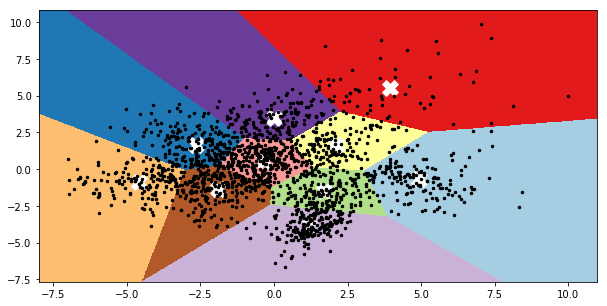

In [84]:
# 64차원 -> 2차원으로 차원축소 후 시각화
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


# 데이터 적재 및 분할
digits = load_digits()

data = scale(digits.data)   # 단위조정

target = digits.target
n_digits = len(np.unique(target))   # 군집수



# 차원축소 : 64차원 -> 2차원
reduced_data = PCA(n_components=2).fit_transform(data)



# kmeans 분석
kms = KMeans(n_clusters=n_digits, random_state=0)
kms.fit(reduced_data)



# 군집화된 데이터를 시각화 전처리 : 결정경계
x_min = reduced_data[:, 0].min() - 1
x_max = reduced_data[:, 0].max() + 1
y_min = reduced_data[:, 1].min() - 1
y_max = reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), 
                     np.arange(y_min, y_max, 0.02))

Z = kms.predict(np.c_[xx.ravel(), yy.ravel()])
# 위에서 생성한 좌표에 대한 군집결과 생성



# 군집화된 데이터 시각화
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,5))
plt.clf()


plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()),  aspect='auto',
           cmap=plt.cm.Paired, origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


centeroids = kms.cluster_centers_
plt.scatter(centeroids[:, 0], centeroids[:, 1], marker='X', s=250, color='white')

plt.show()
